In [50]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
%matplotlib inline


from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_importance
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from lightgbm import plot_importance

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest

from subprocess import call
from IPython.display import Image

import graphviz
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

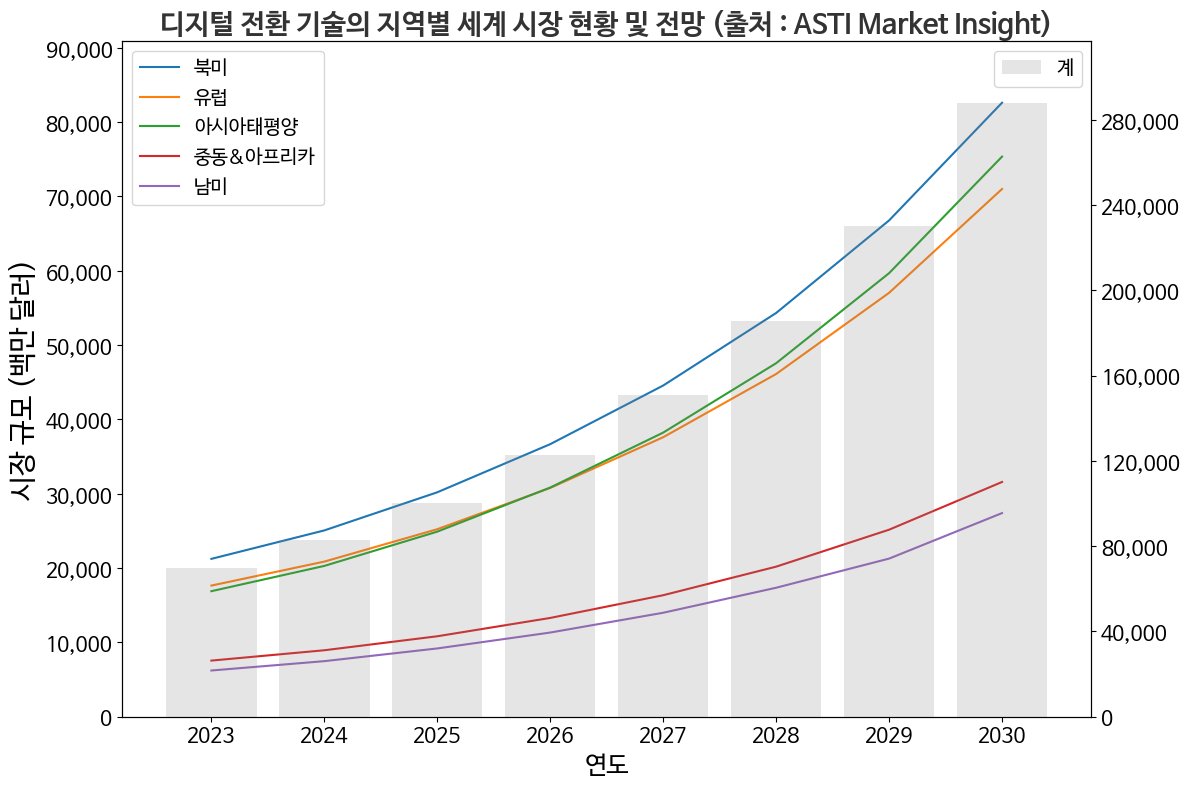

In [2]:
# 데이터 생성
data = {
    '연도': [2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030],
    '북미': [21238.5, 25069.0, 30198.1, 36674.2, 44563.3, 54322.9, 66777.2, 82612.4],
    '유럽': [17645.2, 20873.1, 25231.8, 30782.8, 37605.8, 46114.0, 57035.8, 71006.0],
    '아시아태평양': [16891.6, 20291.1, 24902.3, 30837.4, 38230.7, 47565.8, 59681.6, 75362.4],
    '중동&아프리카': [7552.4, 8942.9, 10824.9, 13291.9, 16348.7, 20191.8, 25164.9, 31584.4],
    '남미': [6218.9, 7476.5, 9186.8, 11326.1, 13989.3, 17353.4, 21276.4, 27400.4],
    '계': [69546.6, 82652.6, 100343.9, 122912.4, 150737.8, 185547.9, 230381.4, 287965.2]
}
df = pd.DataFrame(data)

# 데이터
labels = ['삼성전자 (한국)', '마이크론 (미국)', 'SK 하이닉스 (한국)', '기타']
sizes = [42.8, 27.2, 24.7, 100 - 42.8 - 27.2 - 24.7]
colors = ['#357ABD', '#6D9ACC', '#9AB5D1', '#B3E0E7']  # 두 칸 어두운 파란색 계열

# 데이터프레임 생성
data = pd.DataFrame({
    'Label': labels,
    'Size': sizes
})

# Seaborn 스타일 적용
sns.set(style="whitegrid")

# 파이 차트 그리기
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    data['Size'],
    labels=data['Label'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.3, edgecolor='w')  # 도넛 형태로 두께 설정
)

# 레이블과 퍼센트 텍스트 스타일 설정
for text in texts:
    text.set_fontsize(12)
    text.set_color('black')  # 레이블 텍스트 색상 설정

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')  # 퍼센트 텍스트 색상 설정
    autotext.set_weight('bold')  # 퍼센트 텍스트를 두껍게 설정

# 제목과 그래프 설정
plt.title('글로벌 반도체 시장 점유율 (출처 : )', fontsize=16)
plt.axis('equal')  # 원형으로 보이도록 설정

# 그래프 표시
plt.show()
# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 8))

# 첫 번째 y축 - 나라별 라인 플롯
ax1.set_xlabel('연도', fontsize=18)
ax1.set_ylabel('시장 규모 (백만 달러)', fontsize=20)
for column in df.columns[1:-1]:  # '계' 제외
    ax1.plot(df['연도'], df[column], label=column)

# 두 번째 y축 - '계' 바 플롯
ax2 = ax1.twinx()
ax2.bar(df['연도'], df['계'], alpha=0.2, color='gray', label='계')

# 두 Y축의 범위는 동기화하지 않음
max_y1 = max(df[['북미', '유럽', '아시아태평양', '중동&아프리카', '남미']].max())
max_y2 = max(df['계'])
ax1.set_ylim(0, max_y1 * 1.1)
ax2.set_ylim(0, max_y2 * 1.1)

# Y축 레이블의 개수를 맞추기 위해 Y축 레이블의 간격을 조정
ax1.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# 제목 및 레이블 추가
ax1.set_title('디지털 전환 기술의 지역별 세계 시장 현황 및 전망 (출처 : ASTI Market Insight)', fontsize=20, fontweight='bold', color='#333333')

# 범례 표시 및 글자 크기 조정
ax1.legend(loc='upper left', fontsize=14)  # 왼쪽 Y축 범례
ax2.legend(loc='upper right', fontsize=14)  # 오른쪽 Y축 범례

# X축 및 Y축 레이블의 폰트 크기 설정
ax1.tick_params(axis='x', labelsize=15)  # X축 레이블 크기 조정
ax1.tick_params(axis='y', labelsize=15)  # 왼쪽 Y축 레이블 크기 조정
ax2.tick_params(axis='y', labelsize=15)  # 오른쪽 Y축 레이블 크기 조정

# Y축 레이블에 천 단위 쉼표 추가
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# 그래프 출력
plt.tight_layout()
plt.show()

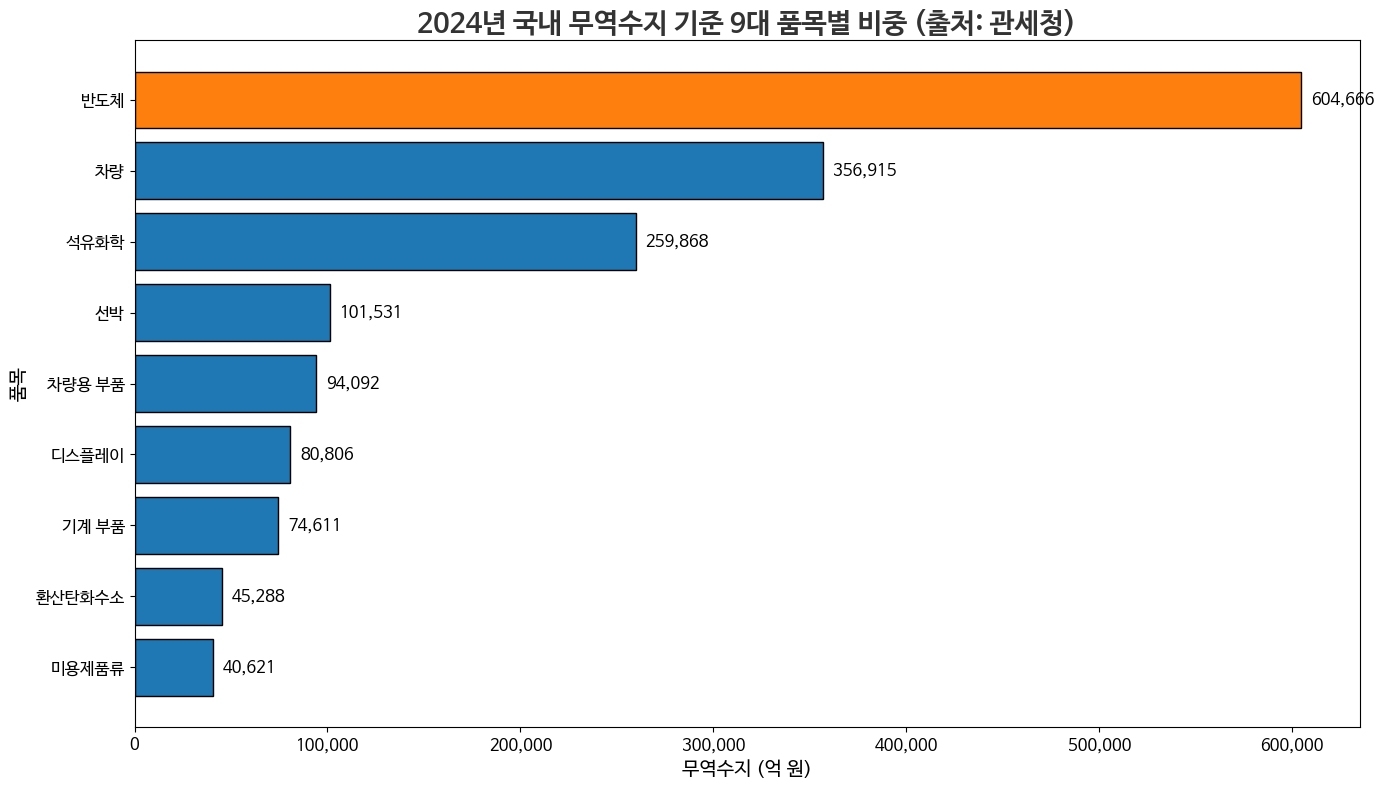

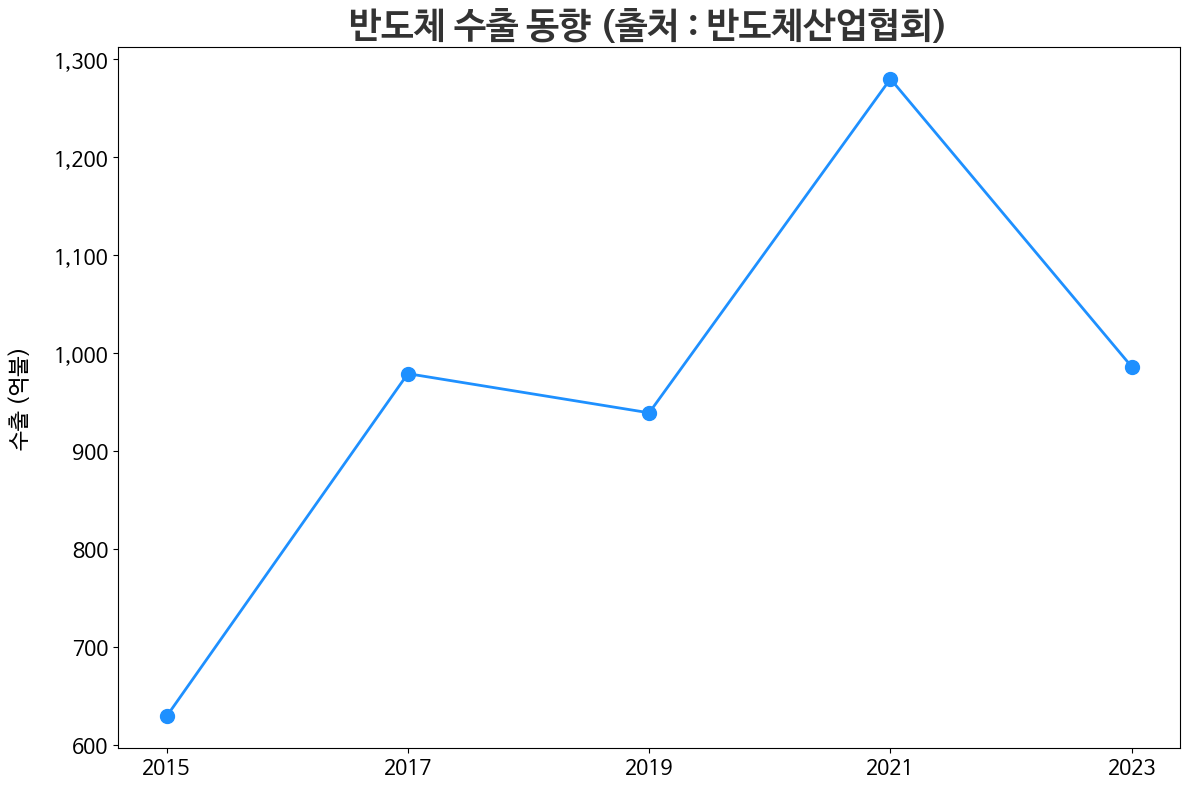

In [4]:
# 데이터 생성
data = {
    'HS코드': [8542, 8703, 2710, 8901, 8708, 9013, 8479, 2902, 3304],
    '품목': ['반도체', '차량', '석유화학', '선박', '차량용 부품', '디스플레이', '기계 부품', '환산탄화수소', '미용제품류'],
    '무역수지': [44056 + 560610, 356915, 259868, 101531, 94092, 80806, 74611, 45288, 40621]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# "반도체"를 가장 밑으로 위치시키기 위해 데이터프레임 재정렬
df = df.set_index('품목')
df = df.reindex(df.index.difference(['반도체']).tolist() + ['반도체']).reset_index()

# 무역수지 값을 기준으로 데이터를 정렬
df = df.sort_values(by='무역수지', ascending=True).reset_index(drop=True)

# 수평 바 차트 생성
plt.figure(figsize=(14, 8))

# 바 차트 색상 설정: '반도체'는 짙은 색, 나머지는 얕은 색
colors = ['#ff7f0e' if item == '반도체' else '#1f77b4' for item in df['품목']]

# 바 차트 그리기
bars = plt.barh(df['품목'], df['무역수지'], color=colors, edgecolor='black')

# 바 레이블 추가
for bar in bars:
    plt.text(bar.get_width() + 5000, bar.get_y() + bar.get_height()/2,
             f'{int(bar.get_width()):,}', va='center', ha='left', fontsize=12, color='black')

# 제목 및 레이블 추가
plt.title('2024년 국내 무역수지 기준 9대 품목별 비중 (출처: 관세청)', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('무역수지 (억 원)', fontsize=14)
plt.ylabel('품목', fontsize=14)

# X축에 천 단위 쉼표 추가
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# X축 및 Y축 레이블의 폰트 크기 설정
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()# 데이터 생성
data = {
    '항목': ['반도체 생산(조원)', '시장점유율(%)', '수출(억불)', '수출증가율(%)', '수입(억불)', '수입증가율(%)', 'DRAM 가격($)'],
    '2015': [69, 17, 629, 0, 383, 5, 3],
    '2017': [103, 18, 979, 57, 412, 5, 2],
    '2019': [134, 18, 939, -26, 470, 5, 2],
    '2021': [201, 20, 1280, 29, 614, 22, 3],
    '2023': [224, 13, 986, 24, 624, 17, 2]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# '항목' 열을 인덱스로 설정
df.set_index('항목', inplace=True)

# 수출(억불) 데이터만 추출
df_export = df.loc['수출(억불)']

# 라인 플롯 생성
plt.figure(figsize=(12, 8))
plt.plot(df_export.index, df_export.values, marker='o', linestyle='-', color='dodgerblue', linewidth=2, markersize=10)

# 그래프 제목과 축 레이블 추가
plt.title('반도체 수출 동향 (출처 : 반도체산업협회)', fontsize=26, fontweight='bold', color='#333333')
plt.ylabel('수출 (억불)', fontsize=16, labelpad=15)

# Y축 값에 천 단위 콤마 추가
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# X축 레이블의 폰트 크기 설정
plt.xticks(fontsize=15)  # X축 레이블 크기 조정
plt.yticks(fontsize=15)  # X축 레이블 크기 조정

# 그래프 여백 조정
plt.tight_layout()

# 그래프 출력
plt.show()

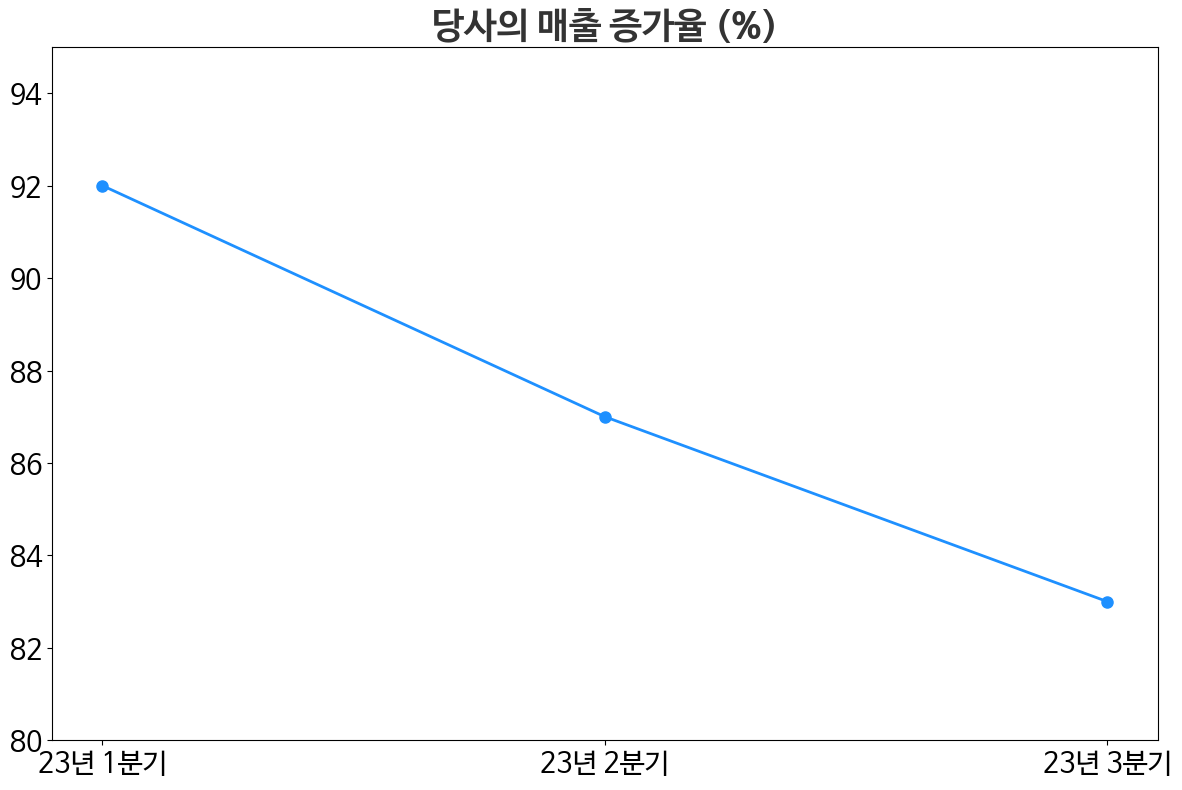

In [5]:
import matplotlib.ticker as mtick

# 데이터
quarters = ['23년 1분기', '23년 2분기', '23년 3분기']
decrease_rates = [92, 87, 83]

# 그래프 생성
plt.figure(figsize=(12, 8))
plt.plot(quarters, decrease_rates, marker='o', linestyle='-', color='dodgerblue', linewidth=2, markersize=8)

# 그래프 제목과 축 레이블 추가
plt.title('당사의 매출 증가율 (%)', fontsize=26, fontweight='bold', color='#333333')

# Y축 범위 설정
plt.ylim(80, 95)

# X축 레이블의 폰트 크기 설정
plt.xticks(fontsize=20)  # X축 레이블 크기 조정
plt.yticks(fontsize=20)  # X축 레이블 크기 조정


# Y축에 천 단위 쉼표 표시
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

# 그래프 여백 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

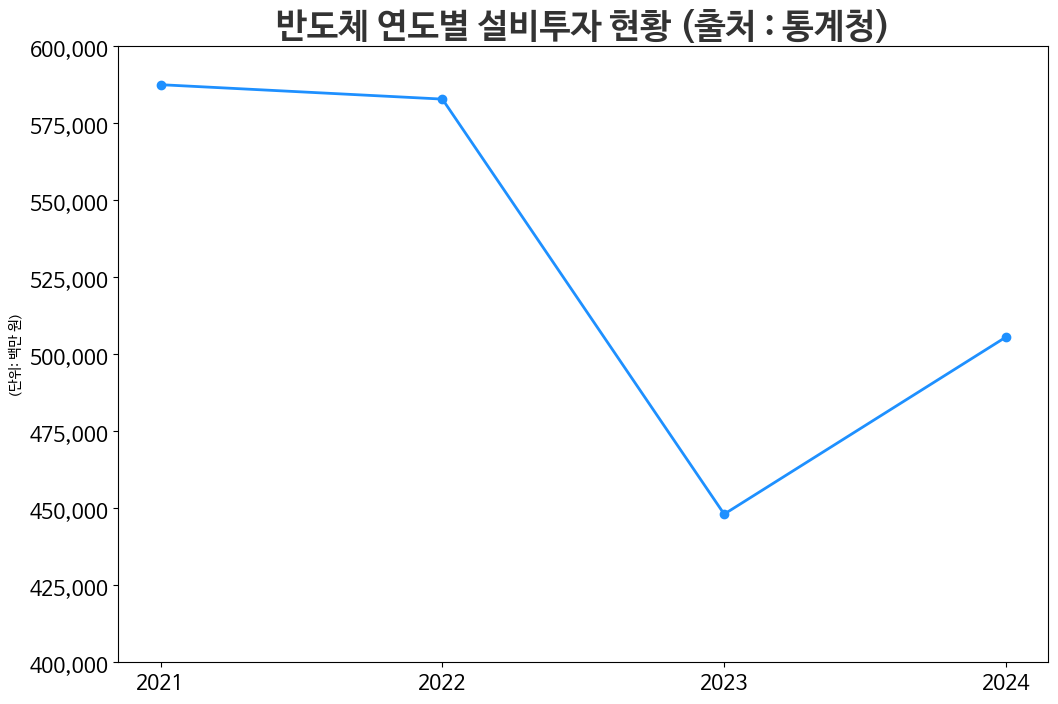

In [6]:
# 데이터를 이미지에서 추출하여 작성
data = {
    "Year": ["2021", "2022", "2023", "2024"],
    "반도체": [587532, 582851, 448096, 505601]  # 2024년 데이터는 없는 것으로 가정하고 0으로 설정
}
# DataFrame 생성
df = pd.DataFrame(data)
# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.plot(df["Year"], df["반도체"], marker='o', linestyle='-', linewidth=2, color='dodgerblue') 
plt.ylabel("(단위: 백만 원)")
plt.title("반도체 연도별 설비투자 현황 (출처 : 통계청)", fontsize=25, fontweight='bold', color='#333333')
plt.ylim(400000, 600000)  # y축 범위 설정

# X축 레이블의 폰트 크기 설정
plt.xticks(fontsize=15)  # X축 레이블 크기 조정
plt.yticks(fontsize=15)  # X축 레이블 크기 조정

# y축 레이블에 천단위 콤마 추가
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()

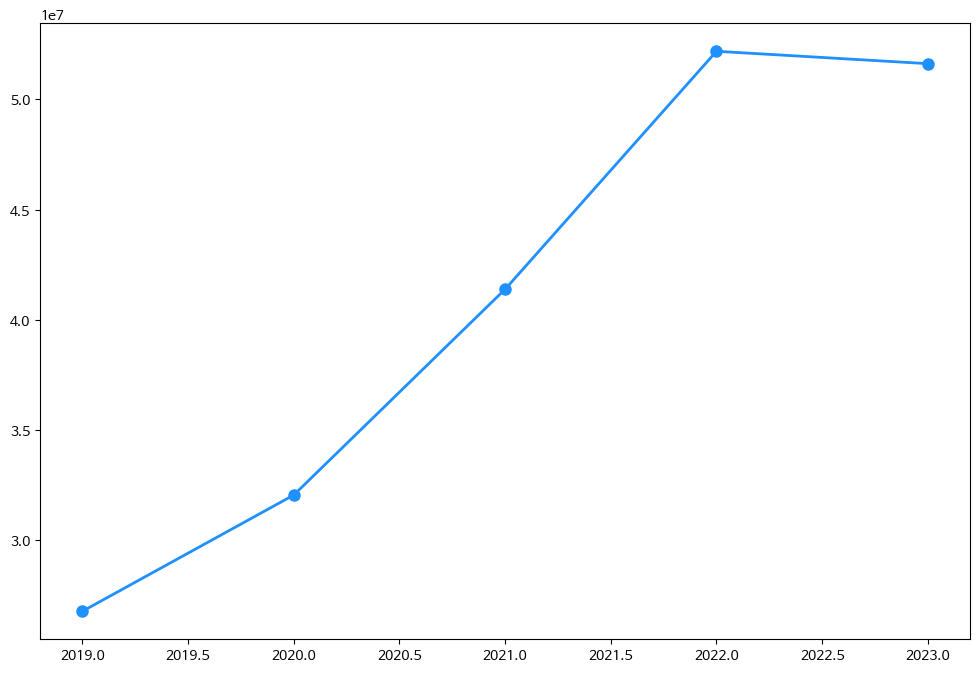

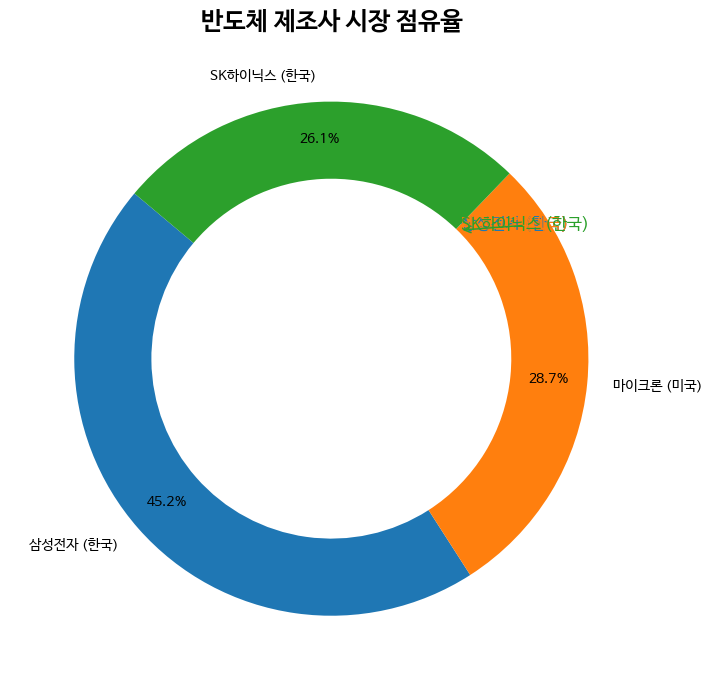

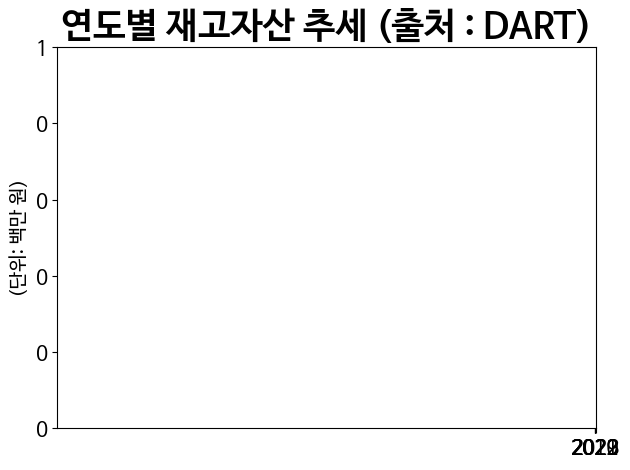

In [7]:
 # 파란 계열 색상과 라인 스타일 설정
values = [51625874, 52187866, 41384404, 32043145, 26766464]
years = [2023, 2022, 2021, 2020, 2019]

# 데이터프레임 생성
df = pd.DataFrame({
    '연도': years,
    '값': values
})

# 라인 플롯 생성
plt.figure(figsize=(12, 8))
plt.plot(df['연도'], df['값'], marker='o', linestyle='-', color='dodgerblue', linewidth=2, markersize=8)
# 데이터 설정
sizes = [42.8, 27.2, 24.7]
labels = ['삼성전자 (한국)', '마이크론 (미국)', 'SK하이닉스 (한국)']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 색상 설정

# 도넛 차트 그리기
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops=dict(width=0.3))

# 레이블 줄 추가
for i, wedge in enumerate(wedges):
    # 중심에서 레이블까지의 거리
    x = wedge.center[0] + 0.5 * wedge.r
    y = wedge.center[1] + 0.5 * wedge.r

    # 레이블과 연결된 선을 그리기 위한 좌표
    ax.annotate(
        labels[i],
        xy=(x, y),
        xytext=(x + 0.1, y + 0.1),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color=colors[i]),
        fontsize=12,
        color=colors[i]
    )

# 도넛 차트 제목 및 기타 설정
ax.set_title('반도체 제조사 시장 점유율', fontsize=18, fontweight='bold')

# 그래프 출력
plt.tight_layout()
plt.show()
# 그래프 제목과 축 레이블 추가
plt.title('연도별 재고자산 추세 (출처 : DART)', fontsize=26, fontweight='bold')
plt.ylabel('(단위: 백만 원)', fontsize=14)

# Y축에 천 단위 쉼표 표시
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# X축 레이블 개수 조정
plt.xticks(ticks=df['연도'], labels=df['연도'].astype(str), fontsize=12)

# X축 레이블의 폰트 크기 설정
plt.xticks(fontsize=15)  # X축 레이블 크기 조정
plt.yticks(fontsize=15)  # X축 레이블 크기 조정

# 그래프 여백 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

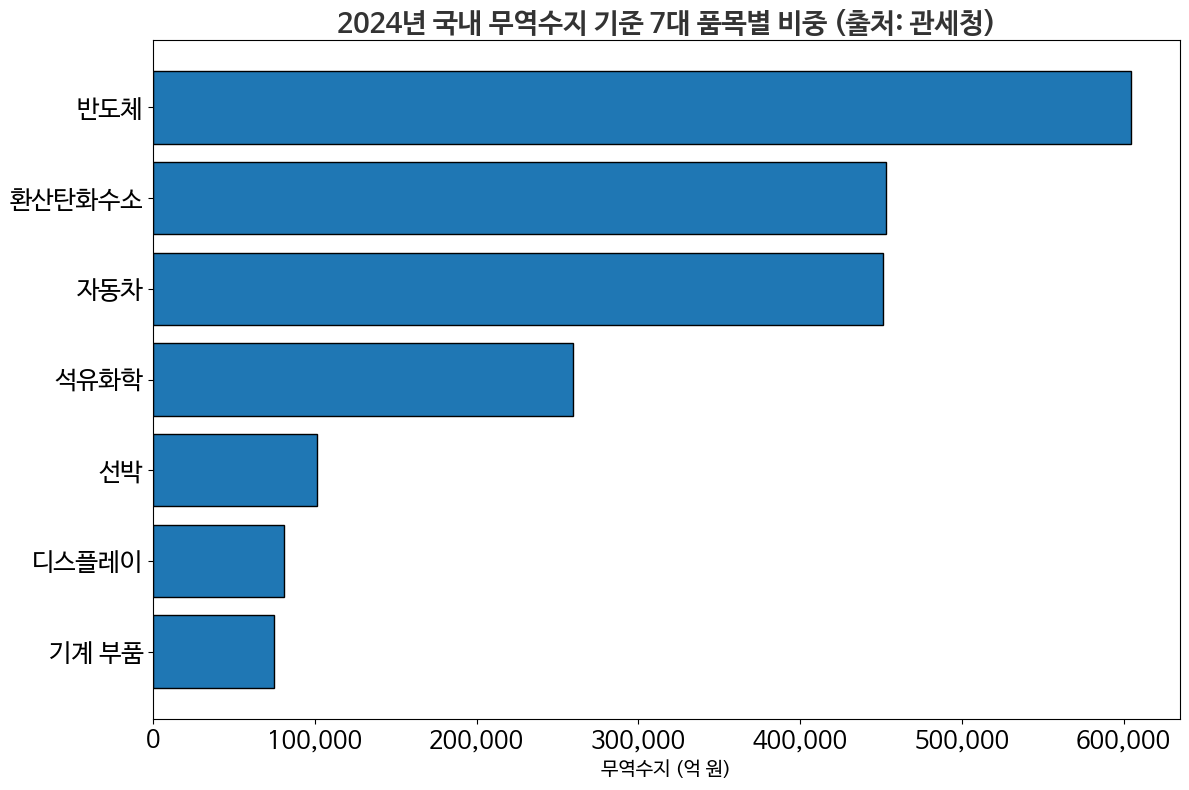

In [8]:
# 데이터 생성
data = {
    'HS코드': [8542, 8703, 2710, 8901, 9013, 8479, 2902],
    '품목': ['반도체', '자동차', '석유화학', '선박', '디스플레이', '기계 부품', '환산탄화수소'],
    '무역수지': [44056 + 560610, 356915 + 94092, 259868, 101531, 80806, 74611, 452881]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# "반도체"를 가장 밑으로 위치시키기 위해 데이터프레임 재정렬
df = df.set_index('품목')
df = df.reindex(df.index.difference(['반도체']).tolist() + ['반도체']).reset_index()

# 무역수지 값을 기준으로 데이터를 정렬
df = df.sort_values(by='무역수지', ascending=True).reset_index(drop=True)

# 수평 바 차트 생성
plt.figure(figsize=(12, 8))

# 바 차트 색상 설정: '반도체'는 짙은 색, 나머지는 얕은 색
colors = '#1f77b4'

# 바 차트 그리기
bars = plt.barh(df['품목'], df['무역수지'], color=colors, edgecolor='black')

# 제목 및 레이블 추가
plt.title('2024년 국내 무역수지 기준 7대 품목별 비중 (출처: 관세청)', fontsize=20, fontweight='bold', color='#333333')
plt.xlabel('무역수지 (억 원)', fontsize=14)

# X축에 천 단위 쉼표 추가
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# X축 및 Y축 레이블의 폰트 크기 설정
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# 그래프 여백 조정
plt.tight_layout()

# 그래프 표시
plt.show()

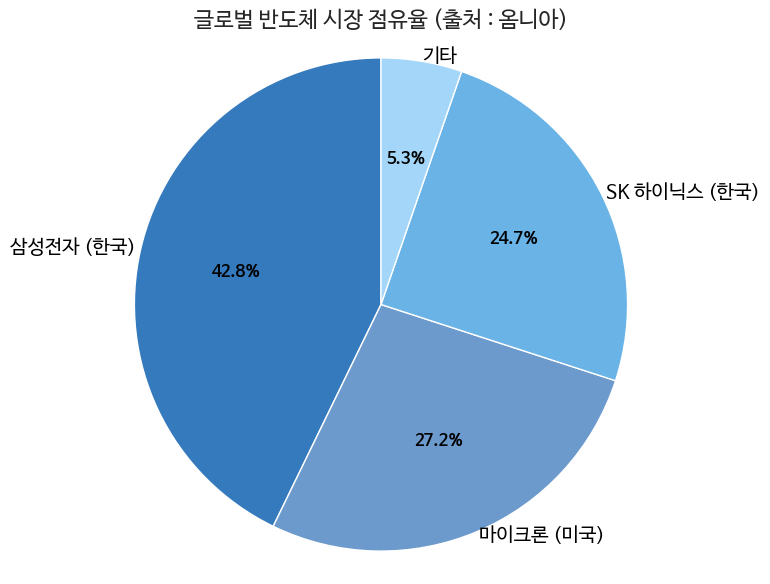

In [56]:
# 데이터
labels = ['삼성전자 (한국)', '마이크론 (미국)', 'SK 하이닉스 (한국)', '기타']
sizes = [42.8, 27.2, 24.7, 100 - 42.8 - 27.2 - 24.7]
colors = ['#357ABD', '#6D9ACC', '#69B3E7', '#A3D6F9']  # 밝은 파란색 계열

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labeldistance=1.02,  # 레이블과 파이 조각 사이의 거리 조정
    textprops={'fontsize': 14, 'color': 'black'}  # 레이블 텍스트 크기와 색상 설정
)

# 레이블과 퍼센트 텍스트 스타일 설정
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('black')  # 퍼센트 텍스트 색상 설정
    autotext.set_weight('bold')  # 퍼센트 텍스트를 두껍게 설정

# 원형을 맞추기 위한 설정
plt.axis('equal')

# 제목 추가
plt.title('글로벌 반도체 시장 점유율 (출처 : 옴니아)', fontsize=16)

# 그래프 표시
plt.show()

In [10]:
T 사 > 매출이 매년 5% 이상증가 / 전체 수출액 30% 이상 감소 / 매출 감소율 8%, 13%, 17% / 작업량 증가 > 장비 부하 증가 > 불량률 증가


22년도 기준 글로벌 반도체 경기 > 지속적 하락 > 제고 확대

SyntaxError: invalid decimal literal (1291824198.py, line 4)